In [49]:
import numpy as np
import torch
import torchvision

np.set_printoptions(precision=3)

## Creating tensors

In [50]:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [51]:
t_ones = torch.ones(2, 3)
print(t_ones)
print(t_ones.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
torch.Size([2, 3])


In [52]:
t_rand = torch.rand(3, 4, 2)
print(t_rand)

tensor([[[0.3163, 0.0102],
         [0.2817, 0.0506],
         [0.5206, 0.3807],
         [0.1056, 0.8498]],

        [[0.4205, 0.3863],
         [0.7579, 0.7975],
         [0.5511, 0.8643],
         [0.3342, 0.2447]],

        [[0.9513, 0.1136],
         [0.8225, 0.2514],
         [0.1150, 0.9483],
         [0.5344, 0.0454]]])


## Manipulating tensors

In [53]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [54]:
t1 = torch.rand(2, 3)
t2 = t1.transpose(0, 1)

print(t1.shape, '--->', t2.shape)

torch.Size([2, 3]) ---> torch.Size([3, 2])


In [55]:
print(t1)
print(t2)

tensor([[0.9155, 0.9132, 0.4804],
        [0.2806, 0.1641, 0.0073]])
tensor([[0.9155, 0.2806],
        [0.9132, 0.1641],
        [0.4804, 0.0073]])


In [56]:
t_z = torch.zeros(24)
t_z_reshape = t_z.reshape(4, 6)
print(t_z_reshape.shape)

torch.Size([4, 6])


In [57]:
t_dims = torch.rand(1,2,3,1,4,1)
t_dims_sqz = t_dims.squeeze()

print(t_dims.shape, '--->', t_dims_sqz.shape)

torch.Size([1, 2, 3, 1, 4, 1]) ---> torch.Size([2, 3, 4])


## Mathematical operations

In [58]:
torch.manual_seed(1310)

t1 = 2 * torch.rand(5, 2) - 1
print(t1)

t2 = torch.normal(mean=0, std=1, size=(5, 2))
print(t2)

tensor([[-0.6821, -0.6755],
        [ 0.2558, -0.7480],
        [ 0.1715, -0.6629],
        [ 0.7016, -0.6044],
        [-0.6553,  0.9626]])
tensor([[ 1.0990,  0.4132],
        [ 0.4879, -0.0149],
        [ 0.3681,  0.2755],
        [ 0.0055,  0.2951],
        [ 0.8312,  0.1270]])


In [59]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[-0.7496, -0.2791],
        [ 0.1248,  0.0111],
        [ 0.0631, -0.1827],
        [ 0.0038, -0.1783],
        [-0.5447,  0.1223]])


In [60]:
t4 = torch.mean(t2, axis=0)
print(t4)

t5 = torch.std(t1, axis=1)
print(t5)

tensor([0.5583, 0.2192])
tensor([0.0047, 0.7098, 0.5900, 0.9235, 1.1441])


In [61]:
t6 = torch.matmul(t1, torch.transpose(t2, 0, 1)) # 5x2 * 2x5 = 5x5
print(t6)

tensor([[-1.0287, -0.3227, -0.4372, -0.2030, -0.6527],
        [-0.0279,  0.1360, -0.1119, -0.2193,  0.1176],
        [-0.0854,  0.0935, -0.1195, -0.1947,  0.0583],
        [ 0.5214,  0.3513,  0.0917, -0.1745,  0.5064],
        [-0.3225, -0.3341,  0.0240,  0.2805, -0.4224]])


In [62]:
t7 = torch.matmul(torch.transpose(t1, 0, 1), t2) # 2x5 * 5x2 = 2x2
print(t7)

tensor([[-1.1025, -0.1146],
        [-0.5545, -0.5067]])


In [63]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.9599, 0.7906, 0.6847, 0.9260, 1.1645])


## Splitting, stacking, concatenating

In [64]:
t = torch.rand(2, 6)
print(t)

tensor([[0.6116, 0.5911, 0.3605, 0.5268, 0.6395, 0.2758],
        [0.6976, 0.8649, 0.0267, 0.6600, 0.7757, 0.2714]])


In [65]:
t_splits = t.chunk(3, dim=1)
for arr in t_splits:
    print(arr)

tensor([[0.6116, 0.5911],
        [0.6976, 0.8649]])
tensor([[0.3605, 0.5268],
        [0.0267, 0.6600]])
tensor([[0.6395, 0.2758],
        [0.7757, 0.2714]])


In [66]:
t = torch.rand(5)
print(t)

tensor([0.1939, 0.2255, 0.3841, 0.2699, 0.9746])


In [67]:
t_splits = t.split(split_size=[3,2])
for arr in t_splits:
    print(arr)

tensor([0.1939, 0.2255, 0.3841])
tensor([0.2699, 0.9746])


In [68]:
t_concat = torch.tensor([])
for arr in t_splits:
    t_concat = torch.cat([t_concat, arr], axis=0)
print(t_concat)

tensor([0.1939, 0.2255, 0.3841, 0.2699, 0.9746])


In [69]:
t_concat_stack = torch.stack([t_concat, t_concat], axis=1) # stacked horizontally (axis 1, in columns)
print(t_concat_stack)

tensor([[0.1939, 0.1939],
        [0.2255, 0.2255],
        [0.3841, 0.3841],
        [0.2699, 0.2699],
        [0.9746, 0.9746]])


## DataLoader

In [70]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [71]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [72]:
data_loader = DataLoader(t, batch_size=3)
for i, item in enumerate(data_loader, 1):
    print(f'batch {i}: {item}')

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


## Datasets

In [73]:
tx = torch.rand([4,3], dtype=torch.float32)
ty = torch.randint(size=[4], low=0, high=4, dtype=torch.int32)

In [74]:
from torch.utils.data import Dataset

In [75]:
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [76]:
joint_ds = JointDataset(tx, ty)

for sample in joint_ds:
    print('x: ', sample[0], ', y: ', sample[1])

x:  tensor([0.8503, 0.2513, 0.0840]) , y:  tensor(0, dtype=torch.int32)
x:  tensor([0.2841, 0.3641, 0.2258]) , y:  tensor(3, dtype=torch.int32)
x:  tensor([0.4640, 0.5711, 0.8046]) , y:  tensor(0, dtype=torch.int32)
x:  tensor([0.8567, 0.7290, 0.3201]) , y:  tensor(0, dtype=torch.int32)


## Shuffle, batch, and repeat

In [77]:
data_loader = DataLoader(dataset=joint_ds, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}: x:{batch[0]}, y:{batch[1]}')

batch 1: x:tensor([[0.8503, 0.2513, 0.0840],
        [0.4640, 0.5711, 0.8046]]), y:tensor([0, 0], dtype=torch.int32)
batch 2: x:tensor([[0.2841, 0.3641, 0.2258],
        [0.8567, 0.7290, 0.3201]]), y:tensor([3, 0], dtype=torch.int32)


In [78]:
for epoch in range(1,5):
    print(f'epoch: {epoch}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}: x:{batch[0]}, y:{batch[1]}')

epoch: 1
batch 1: x:tensor([[0.8567, 0.7290, 0.3201],
        [0.2841, 0.3641, 0.2258]]), y:tensor([0, 3], dtype=torch.int32)
batch 2: x:tensor([[0.4640, 0.5711, 0.8046],
        [0.8503, 0.2513, 0.0840]]), y:tensor([0, 0], dtype=torch.int32)
epoch: 2
batch 1: x:tensor([[0.2841, 0.3641, 0.2258],
        [0.4640, 0.5711, 0.8046]]), y:tensor([3, 0], dtype=torch.int32)
batch 2: x:tensor([[0.8567, 0.7290, 0.3201],
        [0.8503, 0.2513, 0.0840]]), y:tensor([0, 0], dtype=torch.int32)
epoch: 3
batch 1: x:tensor([[0.8567, 0.7290, 0.3201],
        [0.2841, 0.3641, 0.2258]]), y:tensor([0, 3], dtype=torch.int32)
batch 2: x:tensor([[0.4640, 0.5711, 0.8046],
        [0.8503, 0.2513, 0.0840]]), y:tensor([0, 0], dtype=torch.int32)
epoch: 4
batch 1: x:tensor([[0.4640, 0.5711, 0.8046],
        [0.8567, 0.7290, 0.3201]]), y:tensor([0, 0], dtype=torch.int32)
batch 2: x:tensor([[0.8503, 0.2513, 0.0840],
        [0.2841, 0.3641, 0.2258]]), y:tensor([0, 3], dtype=torch.int32)


## Dataset from images

In [79]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
files = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(files)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Img 1 shape: (900, 1200, 3)
Img 2 shape: (900, 1200, 3)
Img 3 shape: (900, 742, 3)
Img 4 shape: (800, 1200, 3)
Img 5 shape: (800, 1200, 3)
Img 6 shape: (900, 1200, 3)


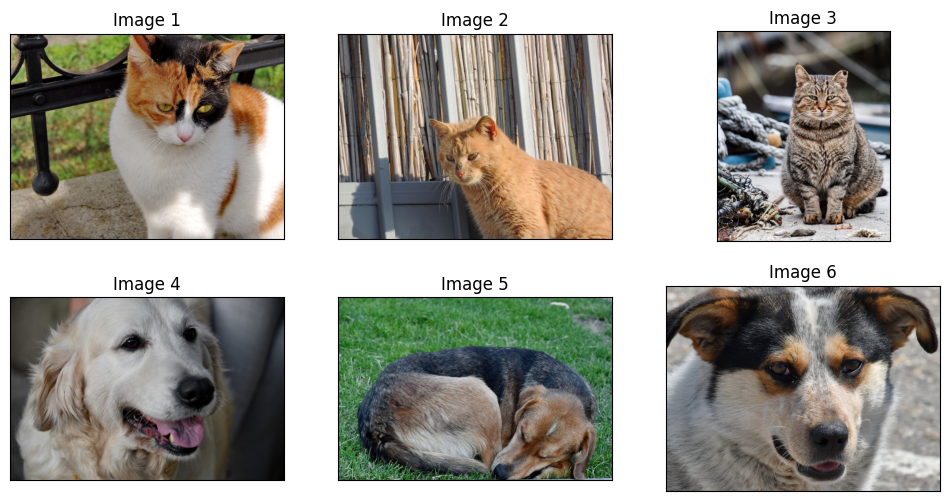

In [80]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
ax = ax.flatten()
for i, file in enumerate(files):
    img = Image.open(file)
    print(f'Img {i+1} shape: {np.array(img).shape}')
    ax[i].imshow(img)
    ax[i].set_title(f'Image {i+1}')
    ax[i].set_xticks([]), ax[i].set_yticks([])

In [81]:
labels = [0]*3 + [1]*3
print(labels) # 1 if dog

[0, 0, 0, 1, 1, 1]


In [82]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels
        
    def __getitem__(self, idx):
        return self.file_list[idx], self.labels[idx]
    
    def __len__(self):
        return self.file_list.shape[0]

In [83]:
img_dataset = ImageDataset(files, labels)

for file, label in img_dataset:
    print(file, label)

cat_dog_images/cat-01.jpg 0
cat_dog_images/cat-02.jpg 0
cat_dog_images/cat-03.jpg 0
cat_dog_images/dog-01.jpg 1
cat_dog_images/dog-02.jpg 1
cat_dog_images/dog-03.jpg 1


In [84]:
import torchvision.transforms as transforms

img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

In [90]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
        
    def __getitem__(self, idx):
        img = Image.open(self.file_list[idx])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[idx]
        return img, label
    
    def __len__(self):
        return len(self.labels)

In [91]:
img_dataset = ImageDataset(files, labels, transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.000551827..1.0000002].


Img 1 shape: (3, 80, 120)
Img 2 shape: (3, 80, 120)
Img 3 shape: (3, 80, 120)
Img 4 shape: (3, 80, 120)
Img 5 shape: (3, 80, 120)
Img 6 shape: (3, 80, 120)


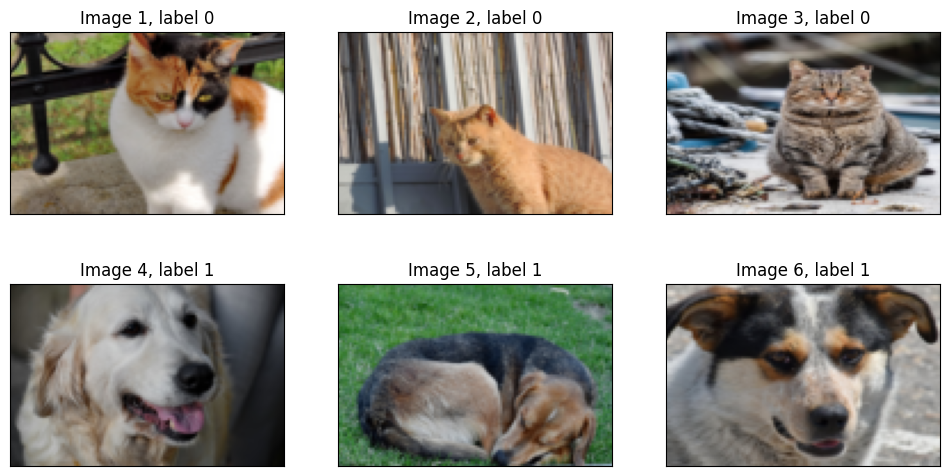

In [95]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
ax = ax.flatten()
for i, (img, label) in enumerate(img_dataset):
    print(f'Img {i+1} shape: {np.array(img).shape}')
    ax[i].imshow(img.numpy().transpose((1, 2, 0)))
    ax[i].set_title(f'Image {i+1}, label {label}')
    ax[i].set_xticks([]), ax[i].set_yticks([])